### Medical Insurance Premium Prediction with `Random Forest Regression`

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [18]:
data_ds = pd.read_csv('./insurance.csv')

In [3]:
data_ds.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data_ds.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data_ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data_ds.shape

(1338, 7)

<Figure size 800x800 with 0 Axes>

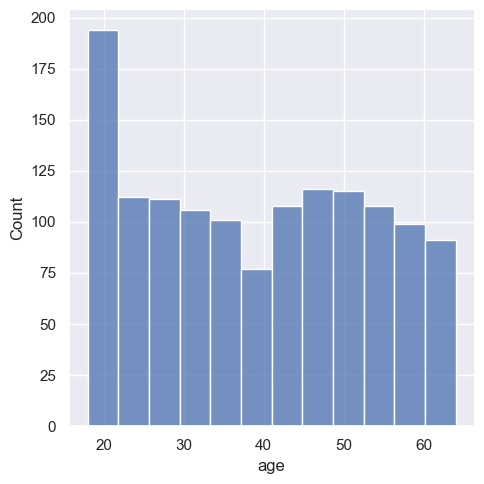

In [9]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(data=data_ds['age'])

C:\Users\musta\AppData\Local\Temp\ipykernel_18580\2421097052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_ds['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

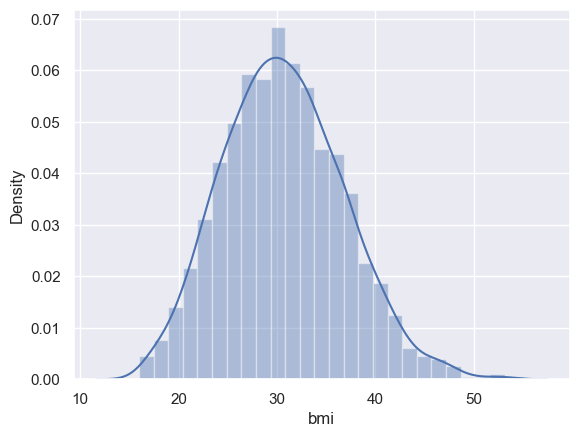

In [12]:
sns.set()
sns.distplot(data_ds['bmi'])

C:\Users\musta\AppData\Local\Temp\ipykernel_18580\3774373900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_ds['children'])


<Axes: xlabel='children', ylabel='Density'>

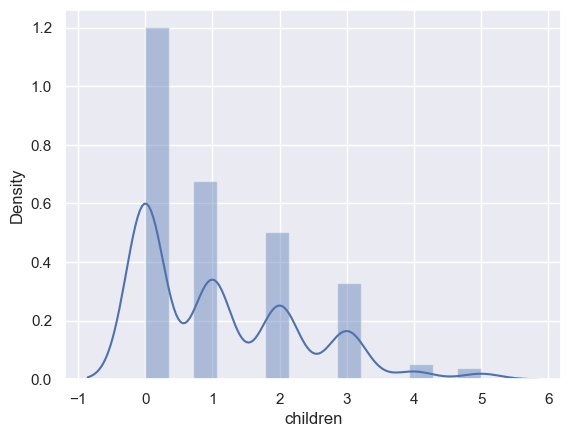

In [13]:
sns.set()
sns.distplot(data_ds['children'])

<Axes: xlabel='sex', ylabel='count'>

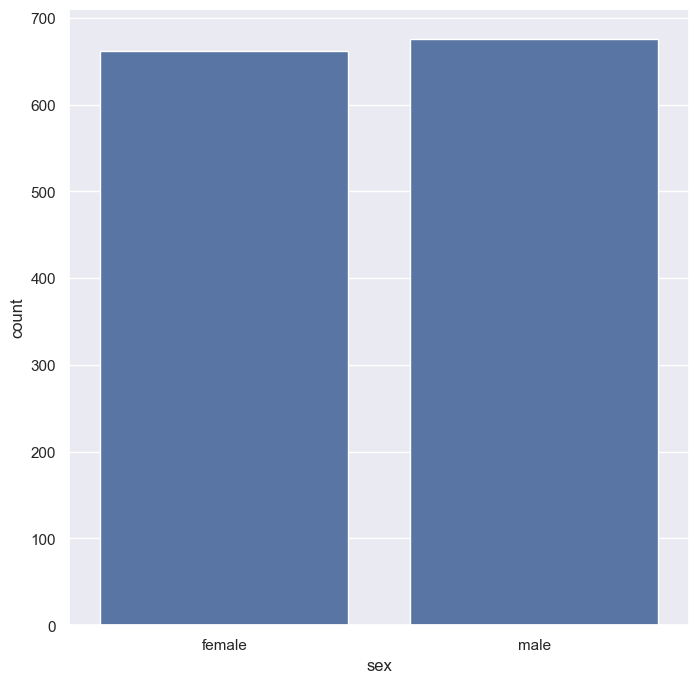

In [14]:
sns.set()
plt.figure(figsize=(8, 8))
sns.countplot(x = data_ds['sex'], data=data_ds)

In [19]:
data_ds.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
data_ds.replace(
    {'sex': {'female':0, 'male':1}, 'smoker':{'no':0, 'yes':1}, 'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True
)

In [23]:
data_ds.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,2,6406.41070
9,60,0,25.840,0,0,3,28923.13692


In [24]:
X = data_ds.drop(columns=['charges'], axis=1)
y = data_ds['charges']

In [25]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [29]:
model = RandomForestRegressor(n_estimators=100, max_depth=7)
model

RandomForestRegressor(max_depth=7)

In [30]:
model.fit(X=X_train, y=y_train)

RandomForestRegressor(max_depth=7)

In [31]:
y_pred = model.predict(X=X_test)

In [32]:
y_pred

array([11466.45081236,  5199.96071094, 28261.27280175, 10880.82238202,
       34780.70674154,  7236.37212079,  2325.11770862, 14253.4634102 ,
        5230.78943482, 11252.82808956, 19582.73698212,  7415.5603023 ,
        4764.16454772, 45303.28147277, 48050.55793567, 44531.07612007,
        9926.24543766, 43257.95542314,  9560.01832283, 25248.6630925 ,
        5772.65123062, 10174.68777268,  2426.42518348,  2802.02190525,
       11816.15482136, 12333.12289483, 13859.03857326,  7196.95508692,
       11743.12649144,  4386.77999399,  7582.98324007, 12066.1252781 ,
        3432.20076947,  6654.14087539,  4157.25846456, 10576.15918298,
        2791.02145332,  8762.00699422, 24243.10596983, 39739.68593968,
        4405.34714091,  4510.85495408, 13097.58244277, 14355.44218176,
        6775.67738646, 14757.07075449, 14887.59032364,  5833.52352487,
       41454.82078718,  5816.31733925, 14248.46411972,  2943.41951698,
        7104.90022558,  2239.50073012, 12258.75064641, 11234.00515938,
      

In [35]:
test_r2_score = r2_score(y_true=y_test, y_pred=y_pred)

In [36]:
test_r2_score

0.8734073526117372

In [38]:
# age	sex	bmi	children	smoker	region	charges

In [45]:
input_data = ( 34, 1, 40, 2, 0, 0)
input_data_np = np.asarray(input_data)
input_data

(34, 1, 40, 2, 0, 0)

In [46]:
input_data_np = input_data_np.reshape(1, -1)

In [47]:
output = model.predict(input_data_np)

d:\miniconda3\envs\DL\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
type(output)

numpy.ndarray

In [57]:
print(f'{int(output[0])} $')

6956 $
